# LGMVIP Task 5 - Develop A Neural Network That Can Read Handwriting

### Importing the necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import pandas as pd
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

### Loading Pre-defined dataset from keras

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Viewing the Data

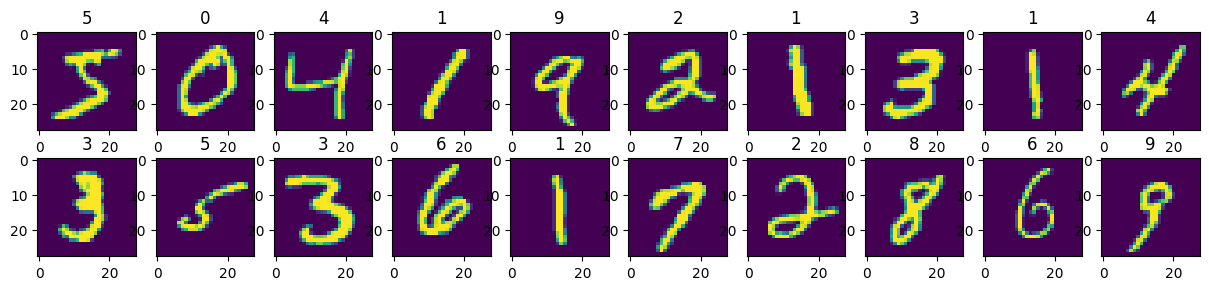

In [4]:
fig = plt.figure(figsize=(15,3))
for i in range(20):
    ax = fig.add_subplot(2, 10, i+1)
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title(y_train[i])

### Normalizing the Data

In [5]:
xtrain = x_train/255.0
xtest = x_test/255.0

### Building the Model

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history1 = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(xtest,y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6743 - accuracy: 0.8694 - val_loss: 2.2034 - val_accuracy: 0.1623
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3882 - accuracy: 0.9099 - val_loss: 2.2396 - val_accuracy: 0.0974
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2763 - accuracy: 0.9304 - val_loss: 2.2797 - val_accuracy: 0.0974
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2408 - accuracy: 0.9368 - val_loss: 2.3135 - val_accuracy: 0.0974
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2232 - accuracy: 0.9444 - val_loss: 2.3324 - val_accuracy: 0.0974


In [9]:
score = model.evaluate(xtest, y_test, verbose=0)
print('Test Accuracy: ', score[1])

Test Accuracy:  0.09740000218153


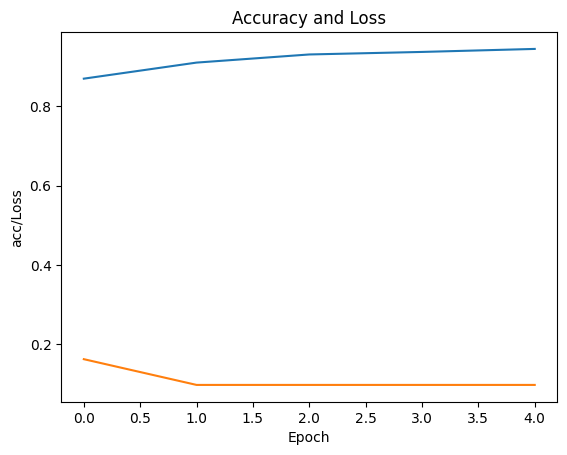

In [10]:
plt.title("Accuracy and Loss")
plt.xlabel('Epoch')
plt.ylabel("acc/Loss")
plt.plot(history1.history['accuracy'], label='acc')
plt.plot(history1.history['val_accuracy'], label='val')
plt.show()

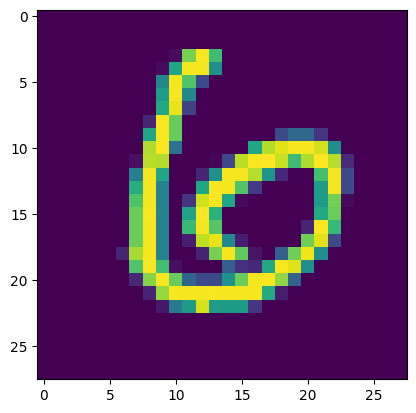

In [11]:
plt.imshow(np.squeeze(x_test[11]))

In [12]:
prediction = model.predict(x_test)
print(np.argmax(prediction[11]))

313/313 [==============================] - 1s 2ms/step
6


**Conclusion:-**

    **We have achieved the accuracy of 97.4% by using CNN model**